### tsdGAN: A generative adversarial network approach for removing electrocardiographic interference from electromyographic signals 
Lucas Haberkamp<sup>1,2</sup>, Charles A. Weisenbach<sup>1</sup>, Peter Le<sup>3</sup>  
<sup>1</sup>Naval Medical Research Unit Dayton, Wright-Patterson Air Force Base, OH, USA   
<sup>2</sup>Leidos, Reston, VA, USA   
<sup>3</sup>Air Force Research Laboratory, 711th Human Performance Wing, Wright-Patterson Air Force Base, OH, USA 

#### This notebook evaluates the performance of the Butterworth high pass filter

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import pickle
import matplotlib.pyplot as plt

Load in synthetic validation dataset

In [2]:
with open('../../Data/Training Data/Validation/x_val.pkl', 'rb') as f:
  x_val = pickle.load(f)

with open('../../Data/Training Data/Validation/y_val.pkl', 'rb') as f:
  y_val = pickle.load(f)

with open('../../Data/Training Data/Validation/label_val.pkl', 'rb') as f:
  label_val = pickle.load(f)

Create a Butterworth filter function

In [3]:
Fs = 2148

def butterfilter(x, Fc, Fs, type='high'):
    Wn = np.asarray(Fc)/np.asarray(Fs/2)
    b, a = signal.butter(2, Wn, type)
    return signal.filtfilt(b,a,x)

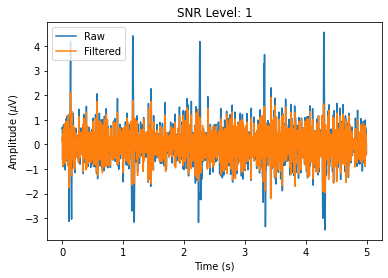

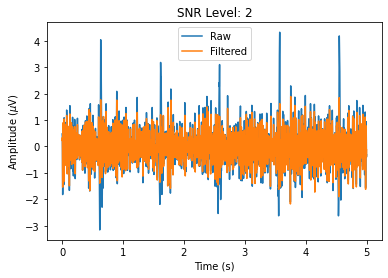

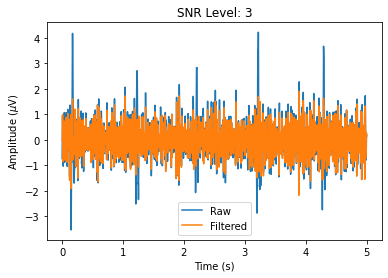

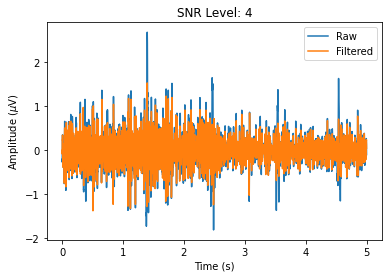

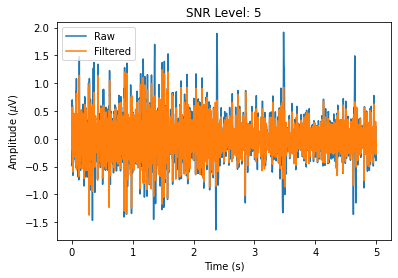

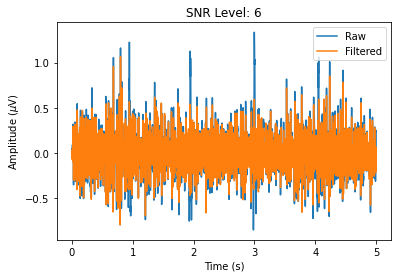

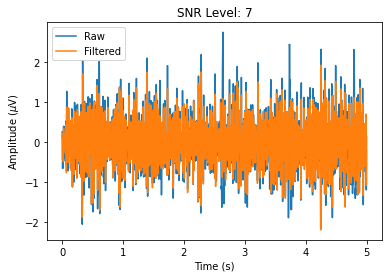

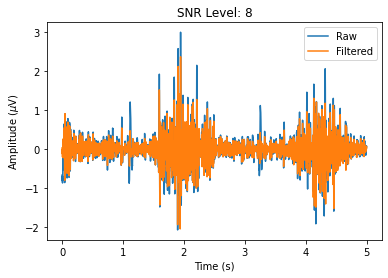

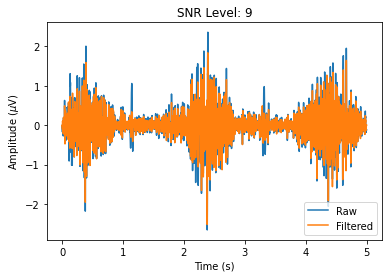

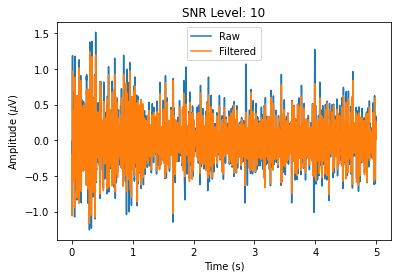

In [4]:
# Define time axis
t = np.arange(len(x_val[1][0]))/Fs

# Apply the template subtraction filter on the validation dataset 
y_pred = {}
for _, key in enumerate(x_val.keys()):
    # Apply the template subtraction method
    y_pred[key] = np.apply_along_axis(butterfilter, axis=1, arr=x_val[key], Fs=Fs, Fc=30, type='high')

    # Generate plot for each SNR level
    plt.plot(t, x_val[key][0], label='Raw')
    plt.plot(t, y_pred[key][0], label='Filtered')
    plt.ylabel("Amplitude ($\mu$V)")
    plt.xlabel("Time (s)")
    plt.legend()
    plt.title(f"SNR Level: {key}")
    plt.show()

In [5]:
with open('../../Data/Synthetic Predictions/HPF.pkl', 'wb') as f:
    pickle.dump(y_pred, f)